### Intel Image 분류 (Kaggle)

##### 데이터 로드

In [75]:
import os

path = 'C://backend_study//Metaverse//03.딥러닝//data//kaggle_HDS//preprocessed_data//'

# tf.keras.preprocessing.image_dataset_from_directory

In [76]:
class_names = os.listdir(path)
class_names

['ellipse', 'other', 'rectangle', 'triangle']

##### X,Y 데이터 분할

In [77]:
from glob import glob
import numpy as np
from PIL import Image


X = []
y = []

for class_name in class_names:
    images = glob(path+class_name+'//*.png')
    print(images[:10])

    for image in images:
        img = Image.open(image)
        X.append(np.array(img))
        y.append(class_name)

['C://backend_study//Metaverse//03.딥러닝//data//kaggle_HDS//preprocessed_data//ellipse\\ellipse.aly.0001.png', 'C://backend_study//Metaverse//03.딥러닝//data//kaggle_HDS//preprocessed_data//ellipse\\ellipse.aly.0002.png', 'C://backend_study//Metaverse//03.딥러닝//data//kaggle_HDS//preprocessed_data//ellipse\\ellipse.aly.0003.png', 'C://backend_study//Metaverse//03.딥러닝//data//kaggle_HDS//preprocessed_data//ellipse\\ellipse.aly.0004.png', 'C://backend_study//Metaverse//03.딥러닝//data//kaggle_HDS//preprocessed_data//ellipse\\ellipse.aly.0005.png', 'C://backend_study//Metaverse//03.딥러닝//data//kaggle_HDS//preprocessed_data//ellipse\\ellipse.aly.0006.png', 'C://backend_study//Metaverse//03.딥러닝//data//kaggle_HDS//preprocessed_data//ellipse\\ellipse.aly.0007.png', 'C://backend_study//Metaverse//03.딥러닝//data//kaggle_HDS//preprocessed_data//ellipse\\ellipse.aly.0008.png', 'C://backend_study//Metaverse//03.딥러닝//data//kaggle_HDS//preprocessed_data//ellipse\\ellipse.aly.0009.png', 'C://backend_study//Metaver

ellipse


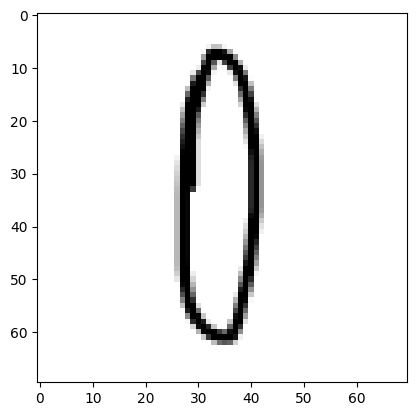

In [6]:
import matplotlib.pyplot as plt

plt.imshow(X[0])
print(y[0])

ellipse


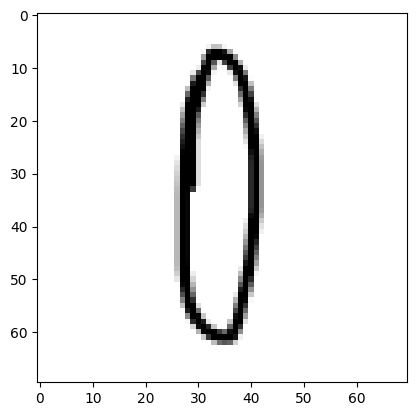

In [7]:
plt.imshow(X[0][:,:,:3])
print(y[0])

ellipse


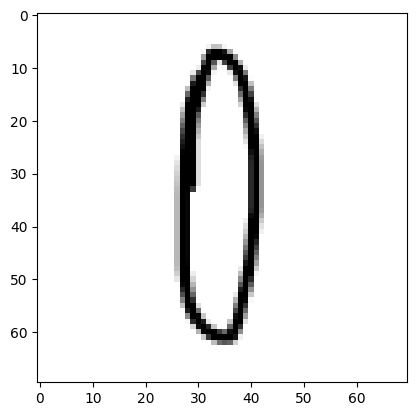

In [8]:
plt.imshow(X[0][:,:,:4])
print(y[0])

In [78]:
X[0].shape

(70, 70, 4)

In [79]:
X = np.array(X)
X.shape

(27292, 70, 70, 4)

##### png 이미지 4번쨰 채널 제거

In [80]:
X = X[:,:,:,:3]
X.shape

(27292, 70, 70, 3)

In [81]:
y[:10]

['ellipse',
 'ellipse',
 'ellipse',
 'ellipse',
 'ellipse',
 'ellipse',
 'ellipse',
 'ellipse',
 'ellipse',
 'ellipse']

##### Label Encoding

In [82]:
from sklearn.preprocessing import LabelEncoder

label_names = class_names
encoder = LabelEncoder()
encoder.fit(label_names)
y = encoder.transform(y)
y[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

##### 스케일링 (/255)

In [83]:
X = X/255
X[0]

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]])

0


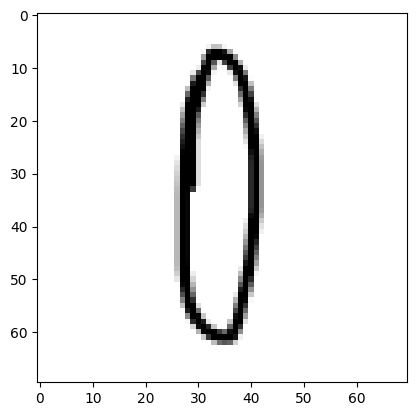

In [19]:
import matplotlib.pyplot as plt

plt.imshow(X[0])
print(y[0])

In [84]:
X.shape ,y.shape

((27292, 70, 70, 3), (27292,))

##### train / test 분할

In [85]:
from sklearn.model_selection import train_test_split

X_train ,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=100,shuffle=True)

In [25]:
X_train.shape , y_train.shape , X_test.shape , y_test.shape

((21833, 70, 70, 3), (21833,), (5459, 70, 70, 3), (5459,))

##### 학습 layers = 6, epochs = 10

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten


model = Sequential()

model.add(Flatten(input_shape=(70,70,3,)))
model.add( Dense (512, activation = 'relu'))
model.add( Dense (256, activation = 'relu'))
model.add( Dense (128, activation = 'relu'))
model.add( Dense (64,activation = 'relu'))
model.add( Dense (32,activation= 'relu') )
model.add( Dense (4,activation='softmax') )

# 다중 분류시 loss : categorical_crossentropy
# 단, Label Encdoing 시 : sparse_catogorical_crossentropy
model.compile(optimizer='Adam',loss = 'sparse_categorical_crossentropy',metrics=['acc'])

# history : 학습 내역 저장
history = model.fit(X_train,y_train,epochs=10)

Epoch 1/10
683/683 [==============================] - 90s 127ms/step - loss: 1.3345 - acc: 0.4224
Epoch 2/10
683/683 [==============================] - 91s 133ms/step - loss: 1.0326 - acc: 0.5657
Epoch 3/10
683/683 [==============================] - 88s 128ms/step - loss: 0.9160 - acc: 0.6341
Epoch 4/10
683/683 [==============================] - 83s 121ms/step - loss: 0.8551 - acc: 0.6668
Epoch 5/10
683/683 [==============================] - 82s 120ms/step - loss: 0.7790 - acc: 0.7008
Epoch 6/10
683/683 [==============================] - 80s 116ms/step - loss: 0.7248 - acc: 0.7208
Epoch 7/10
683/683 [==============================] - 82s 120ms/step - loss: 0.6753 - acc: 0.7388
Epoch 8/10
683/683 [==============================] - 81s 118ms/step - loss: 0.6403 - acc: 0.7556
Epoch 9/10
683/683 [==============================] - 80s 117ms/step - loss: 0.6201 - acc: 0.7674
Epoch 10/10
683/683 [==============================] - 80s 117ms/step - loss: 0.5869 - acc: 0.7786


In [33]:
import matplotlib.pyplot as plt

acc = history.history['acc']
loss = history.history['loss']

# val_acc = history.history['val_acc']
# val_loss = history.history['val_loss']

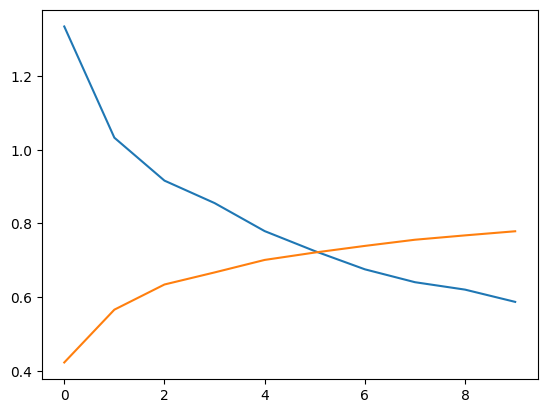

In [34]:
plt.figure()
plt.plot(range(len(loss)),loss)
plt.plot(range(len(acc)),acc)

In [35]:
model.evaluate(X_test,y_test)

171/171 [==============================] - 2s 10ms/step - loss: 0.5759 - acc: 0.7774


[0.5758880972862244, 0.7774317860603333]

##### rgb2gray 전처리 후 학습

In [45]:
from skimage import color
from skimage import io

imgGray = color.rgb2gray(X_train[0])

imgGray.shape

(70, 70)

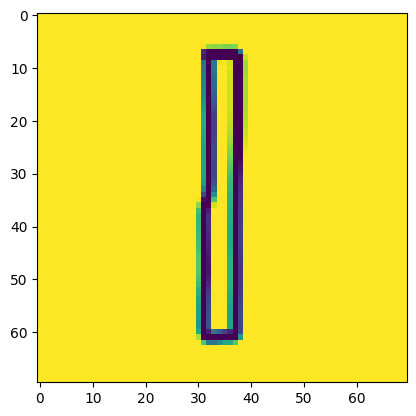

In [46]:
plt.imshow(imgGray)

In [86]:
X_train = color.rgb2gray(X_train)
X_train.shape

(21833, 70, 70)

In [94]:
X_test = color.rgb2gray(X_test)
X_test.shape

(5459, 70, 70)

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten


model_rgb2gray = Sequential()

model_rgb2gray.add(Flatten(input_shape=(70,70,)))
model_rgb2gray.add( Dense (512, activation = 'relu'))
model_rgb2gray.add( Dense (256, activation = 'relu'))
model_rgb2gray.add( Dense (128, activation = 'relu'))
model_rgb2gray.add( Dense (64,activation = 'relu'))
model_rgb2gray.add( Dense (32,activation= 'relu') )
model_rgb2gray.add( Dense (4,activation='softmax') )

# 다중 분류시 loss : categorical_crossentropy
# 단, Label Encdoing 시 : sparse_catogorical_crossentropy
model_rgb2gray.compile(optimizer='Adam',loss = 'sparse_categorical_crossentropy',metrics=['acc'])

# history : 학습 내역 저장
history = model_rgb2gray.fit(X_train,y_train,epochs=10)

Epoch 1/10
683/683 [==============================] - 34s 49ms/step - loss: 1.2494 - acc: 0.4179
Epoch 2/10
683/683 [==============================] - 29s 43ms/step - loss: 1.0127 - acc: 0.5785
Epoch 3/10
683/683 [==============================] - 30s 44ms/step - loss: 0.8910 - acc: 0.6406
Epoch 4/10
683/683 [==============================] - 30s 43ms/step - loss: 0.7969 - acc: 0.6890
Epoch 5/10
683/683 [==============================] - 29s 42ms/step - loss: 0.7230 - acc: 0.7207
Epoch 6/10
683/683 [==============================] - 29s 42ms/step - loss: 0.6724 - acc: 0.7410
Epoch 7/10
683/683 [==============================] - 29s 42ms/step - loss: 0.6616 - acc: 0.7449
Epoch 8/10
683/683 [==============================] - 29s 43ms/step - loss: 0.6099 - acc: 0.7671
Epoch 9/10
683/683 [==============================] - 29s 42ms/step - loss: 0.5923 - acc: 0.7773
Epoch 10/10
683/683 [==============================] - 29s 43ms/step - loss: 0.5655 - acc: 0.7875


In [53]:
import matplotlib.pyplot as plt

acc = history.history['acc']
loss = history.history['loss']

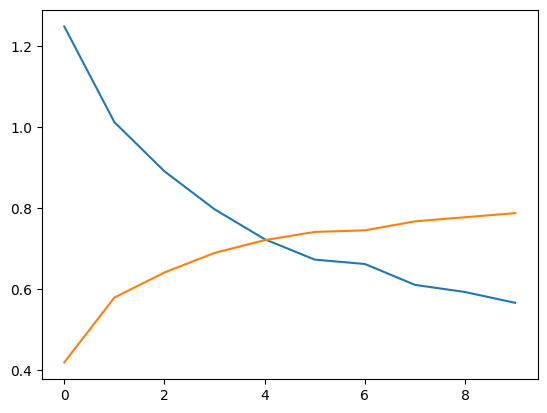

In [54]:
plt.figure()
plt.plot(range(len(loss)),loss)
plt.plot(range(len(acc)),acc)

In [95]:
model_rgb2gray.evaluate(X_test,y_test)

171/171 [==============================] - 1s 7ms/step - loss: 0.5172 - acc: 0.8091


[0.5172008275985718, 0.8091225624084473]

##### 학습 layers = 7, epochs = 50

In [87]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten


model_rgb2gray2 = Sequential()

model_rgb2gray2.add(Flatten(input_shape=(70,70,)))
model_rgb2gray2.add( Dense (512, activation = 'relu'))
model_rgb2gray2.add( Dense (256, activation = 'relu'))
model_rgb2gray2.add( Dense (128, activation = 'relu'))
model_rgb2gray2.add( Dense (64,activation = 'relu'))
model_rgb2gray2.add( Dense (32,activation= 'relu') )
model_rgb2gray2.add( Dense (16,activation= 'relu') )
model_rgb2gray2.add( Dense (4,activation='softmax') )

# 다중 분류시 loss : categorical_crossentropy
# 단, Label Encdoing 시 : sparse_catogorical_crossentropy
model_rgb2gray2.compile(optimizer='Adam',loss = 'sparse_categorical_crossentropy',metrics=['acc'])

# history : 학습 내역 저장
history = model_rgb2gray2.fit(X_train,y_train,epochs=50)

Epoch 1/50
683/683 [==============================] - 33s 46ms/step - loss: 1.3136 - acc: 0.3697
Epoch 2/50
683/683 [==============================] - 30s 44ms/step - loss: 1.0761 - acc: 0.5347
Epoch 3/50
683/683 [==============================] - 37s 54ms/step - loss: 0.9448 - acc: 0.6173
Epoch 4/50
683/683 [==============================] - 1846s 3s/step - loss: 0.8448 - acc: 0.6667
Epoch 5/50
683/683 [==============================] - 30s 43ms/step - loss: 0.7935 - acc: 0.6907
Epoch 6/50
683/683 [==============================] - 29s 43ms/step - loss: 0.7255 - acc: 0.7161
Epoch 7/50
683/683 [==============================] - 29s 42ms/step - loss: 0.6951 - acc: 0.7316
Epoch 8/50
683/683 [==============================] - 29s 42ms/step - loss: 0.6489 - acc: 0.7518
Epoch 9/50
683/683 [==============================] - 29s 43ms/step - loss: 0.6112 - acc: 0.7695
Epoch 10/50
683/683 [==============================] - 29s 43ms/step - loss: 0.5993 - acc: 0.7752
Epoch 11/50
683/683 [========

In [91]:
import matplotlib.pyplot as plt

acc = history.history['acc']
loss = history.history['loss']

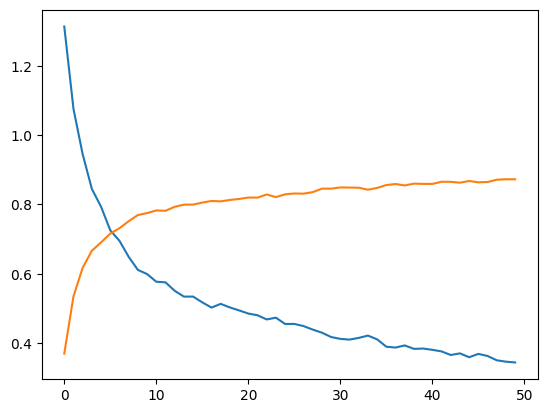

In [92]:
plt.figure()
plt.plot(range(len(loss)),loss)
plt.plot(range(len(acc)),acc)

In [96]:
model_rgb2gray2.evaluate(X_test,y_test)

171/171 [==============================] - 2s 7ms/step - loss: 0.4810 - acc: 0.8333


[0.4810497462749481, 0.8333027958869934]

##### 학습 layers = 9, epochs = 50

In [98]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten


model_rgb2gray3 = Sequential()

model_rgb2gray3.add(Flatten(input_shape=(70,70,)))
model_rgb2gray3.add( Dense (1024, activation = 'relu'))
model_rgb2gray3.add( Dense (512, activation = 'relu'))
model_rgb2gray3.add( Dense (256, activation = 'relu'))
model_rgb2gray3.add( Dense (128, activation = 'relu'))
model_rgb2gray3.add( Dense (64,activation = 'relu'))
model_rgb2gray3.add( Dense (32,activation= 'relu') )
model_rgb2gray3.add( Dense (16,activation= 'relu') )
model_rgb2gray3.add( Dense (4,activation='softmax') )

# 다중 분류시 loss : categorical_crossentropy
# 단, Label Encdoing 시 : sparse_catogorical_crossentropy
model_rgb2gray3.compile(optimizer='Adam',loss = 'sparse_categorical_crossentropy',metrics=['acc'])

# history : 학습 내역 저장
history = model_rgb2gray3.fit(X_train,y_train,epochs=50)

Epoch 1/50
683/683 [==============================] - 62s 89ms/step - loss: 1.2876 - acc: 0.3838
Epoch 2/50
683/683 [==============================] - 60s 89ms/step - loss: 1.0575 - acc: 0.5514
Epoch 3/50
683/683 [==============================] - 59s 87ms/step - loss: 0.9163 - acc: 0.6391
Epoch 4/50
683/683 [==============================] - 59s 87ms/step - loss: 0.8377 - acc: 0.6721
Epoch 5/50
683/683 [==============================] - 59s 87ms/step - loss: 0.8004 - acc: 0.6915
Epoch 6/50
683/683 [==============================] - 60s 88ms/step - loss: 0.7125 - acc: 0.7270
Epoch 7/50
683/683 [==============================] - 60s 88ms/step - loss: 0.6852 - acc: 0.7408
Epoch 8/50
683/683 [==============================] - 59s 87ms/step - loss: 0.6576 - acc: 0.7498
Epoch 9/50
683/683 [==============================] - 59s 87ms/step - loss: 0.6243 - acc: 0.7658
Epoch 10/50
683/683 [==============================] - 59s 87ms/step - loss: 0.5985 - acc: 0.7741
Epoch 11/50
683/683 [========

In [99]:
import matplotlib.pyplot as plt

acc = history.history['acc']
loss = history.history['loss']

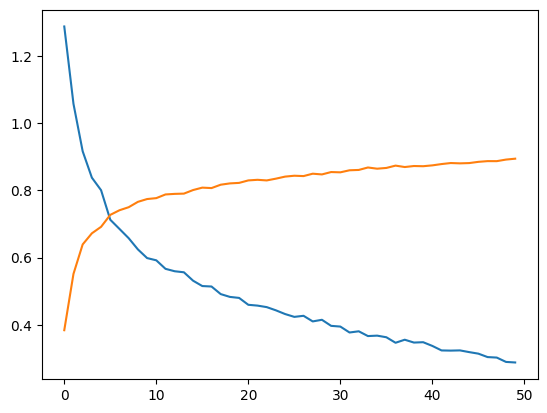

In [100]:
plt.figure()
plt.plot(range(len(loss)),loss)
plt.plot(range(len(acc)),acc)

In [101]:
model_rgb2gray3.evaluate(X_test,y_test)

171/171 [==============================] - 2s 8ms/step - loss: 0.4524 - acc: 0.8480


[0.4524184763431549, 0.8479574918746948]

##### rgb2gray 형태로 데이터 저장

In [59]:
import os

path = 'C://backend_study//Metaverse//03.딥러닝//data//kaggle_HDS//preprocessed_data//'

# tf.keras.preprocessing.image_dataset_from_directory

In [60]:
# 클래스 이름
class_names = os.listdir(path)
class_names

['ellipse', 'other', 'rectangle', 'triangle']

In [61]:
from glob import glob
import numpy as np
from PIL import Image
from tqdm import tqdm


X = []
y = []


for class_name in tqdm(class_names):
    images = glob(path+class_name+'//*.png')
    print(images[:10])

    for image in images:
        img = Image.open(image)
        X.append(np.array(img))
        y.append(class_name)

  0%|          | 0/4 [00:00<?, ?it/s]

['C://backend_study//Metaverse//03.딥러닝//data//kaggle_HDS//preprocessed_data//ellipse\\ellipse.aly.0001.png', 'C://backend_study//Metaverse//03.딥러닝//data//kaggle_HDS//preprocessed_data//ellipse\\ellipse.aly.0002.png', 'C://backend_study//Metaverse//03.딥러닝//data//kaggle_HDS//preprocessed_data//ellipse\\ellipse.aly.0003.png', 'C://backend_study//Metaverse//03.딥러닝//data//kaggle_HDS//preprocessed_data//ellipse\\ellipse.aly.0004.png', 'C://backend_study//Metaverse//03.딥러닝//data//kaggle_HDS//preprocessed_data//ellipse\\ellipse.aly.0005.png', 'C://backend_study//Metaverse//03.딥러닝//data//kaggle_HDS//preprocessed_data//ellipse\\ellipse.aly.0006.png', 'C://backend_study//Metaverse//03.딥러닝//data//kaggle_HDS//preprocessed_data//ellipse\\ellipse.aly.0007.png', 'C://backend_study//Metaverse//03.딥러닝//data//kaggle_HDS//preprocessed_data//ellipse\\ellipse.aly.0008.png', 'C://backend_study//Metaverse//03.딥러닝//data//kaggle_HDS//preprocessed_data//ellipse\\ellipse.aly.0009.png', 'C://backend_study//Metaver

 25%|██▌       | 1/4 [00:05<00:16,  5.67s/it]

['C://backend_study//Metaverse//03.딥러닝//data//kaggle_HDS//preprocessed_data//other\\other.if2.0001.png', 'C://backend_study//Metaverse//03.딥러닝//data//kaggle_HDS//preprocessed_data//other\\other.if2.0002.png', 'C://backend_study//Metaverse//03.딥러닝//data//kaggle_HDS//preprocessed_data//other\\other.if2.0003.png', 'C://backend_study//Metaverse//03.딥러닝//data//kaggle_HDS//preprocessed_data//other\\other.if2.0004.png', 'C://backend_study//Metaverse//03.딥러닝//data//kaggle_HDS//preprocessed_data//other\\other.if2.0005.png', 'C://backend_study//Metaverse//03.딥러닝//data//kaggle_HDS//preprocessed_data//other\\other.if2.0006.png', 'C://backend_study//Metaverse//03.딥러닝//data//kaggle_HDS//preprocessed_data//other\\other.if2.0007.png', 'C://backend_study//Metaverse//03.딥러닝//data//kaggle_HDS//preprocessed_data//other\\other.if2.0008.png', 'C://backend_study//Metaverse//03.딥러닝//data//kaggle_HDS//preprocessed_data//other\\other.if2.0009.png', 'C://backend_study//Metaverse//03.딥러닝//data//kaggle_HDS//prepro

 50%|█████     | 2/4 [00:12<00:13,  6.59s/it]

['C://backend_study//Metaverse//03.딥러닝//data//kaggle_HDS//preprocessed_data//rectangle\\rectangle.aly.0001.png', 'C://backend_study//Metaverse//03.딥러닝//data//kaggle_HDS//preprocessed_data//rectangle\\rectangle.aly.0002.png', 'C://backend_study//Metaverse//03.딥러닝//data//kaggle_HDS//preprocessed_data//rectangle\\rectangle.aly.0003.png', 'C://backend_study//Metaverse//03.딥러닝//data//kaggle_HDS//preprocessed_data//rectangle\\rectangle.aly.0004.png', 'C://backend_study//Metaverse//03.딥러닝//data//kaggle_HDS//preprocessed_data//rectangle\\rectangle.aly.0005.png', 'C://backend_study//Metaverse//03.딥러닝//data//kaggle_HDS//preprocessed_data//rectangle\\rectangle.aly.0006.png', 'C://backend_study//Metaverse//03.딥러닝//data//kaggle_HDS//preprocessed_data//rectangle\\rectangle.aly.0007.png', 'C://backend_study//Metaverse//03.딥러닝//data//kaggle_HDS//preprocessed_data//rectangle\\rectangle.aly.0008.png', 'C://backend_study//Metaverse//03.딥러닝//data//kaggle_HDS//preprocessed_data//rectangle\\rectangle.aly.00

 75%|███████▌  | 3/4 [00:19<00:06,  6.45s/it]

['C://backend_study//Metaverse//03.딥러닝//data//kaggle_HDS//preprocessed_data//triangle\\triangle.aly.0001.png', 'C://backend_study//Metaverse//03.딥러닝//data//kaggle_HDS//preprocessed_data//triangle\\triangle.aly.0002.png', 'C://backend_study//Metaverse//03.딥러닝//data//kaggle_HDS//preprocessed_data//triangle\\triangle.aly.0003.png', 'C://backend_study//Metaverse//03.딥러닝//data//kaggle_HDS//preprocessed_data//triangle\\triangle.aly.0004.png', 'C://backend_study//Metaverse//03.딥러닝//data//kaggle_HDS//preprocessed_data//triangle\\triangle.aly.0005.png', 'C://backend_study//Metaverse//03.딥러닝//data//kaggle_HDS//preprocessed_data//triangle\\triangle.aly.0006.png', 'C://backend_study//Metaverse//03.딥러닝//data//kaggle_HDS//preprocessed_data//triangle\\triangle.aly.0007.png', 'C://backend_study//Metaverse//03.딥러닝//data//kaggle_HDS//preprocessed_data//triangle\\triangle.aly.0008.png', 'C://backend_study//Metaverse//03.딥러닝//data//kaggle_HDS//preprocessed_data//triangle\\triangle.aly.0009.png', 'C://back

100%|██████████| 4/4 [00:23<00:00,  5.97s/it]


In [63]:
X[:3]

[array([[[255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         ...,
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255]],
 
        [[255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         ...,
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255]],
 
        [[255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         ...,
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255]],
 
        ...,
 
        [[255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         ...,
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255]],
 
        [[255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         ...,
         [255, 255, 255, 255],
         [255, 255, 255, 255],
    

In [64]:
X = np.array(X)
X.shape

(27292, 70, 70, 4)

In [65]:
X = X[:,:,:,:3]
X.shape

(27292, 70, 70, 3)

In [66]:
from skimage import color
from skimage import io

X = color.rgb2gray(X)
X.shape

(27292, 70, 70)

In [69]:
y[:10]

['ellipse',
 'ellipse',
 'ellipse',
 'ellipse',
 'ellipse',
 'ellipse',
 'ellipse',
 'ellipse',
 'ellipse',
 'ellipse']

In [72]:
import pickle

save_path = 'C://backend_study//Metaverse//03.딥러닝//data//kaggle_HDS_rgb2gray//'

np.save(save_path+'X_rgb2gray',X)


# python 변수(객체)를 pickle 파일로 저장
with open(save_path+'y.pkl', 'wb') as f:
    pickle.dump(y, f)
 
# pickle 파일 불러오기
# with open([파일], 'rb') as f:
#     var = pickle.load(f)